In [114]:
# Install Libraries
#!pip install tweepy

In [165]:
# Import Libraries

from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string

from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

In [166]:
# Authentication Key for Tweeter API
consumerKey = ""
consumerSecret = ""
accessToken = ""
accessTokenSecret = ""

auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

#### Get Tweet with Keyword od Hastag

In [167]:
def percentage(part,whole):
    return 100 * float(part)/float(whole) 

keyword = input("Please enter keyword or hashtag to search: ")
while True:
    try:
        number_of_tweet_to_analyze = int(input("Please enter how many tweets to analyze: "))
        break
    except ValueError:
        print("Please input integer only...")  
        continue

print("Accepted values, go to the next script which calculates the number of positive, negative and neutral tweets")


tweets = tweepy.Cursor(api.search, q=keyword).items(number_of_tweet_to_analyze)
positive  = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

print("---------------------")

print("\033[1m" + "The last Tweets about your Keyword: "+keyword+" " + "\033[0m")
for tweet in tweets:
    
   
    print(tweet.text)
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
    
    if neg > pos:
        negative_list.append(tweet.text)
        negative += 1

    elif pos > neg:
        positive_list.append(tweet.text)
        positive += 1
    
    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1

positive = percentage(positive, number_of_tweet_to_analyze)
negative = percentage(negative, number_of_tweet_to_analyze)
neutral = percentage(neutral, number_of_tweet_to_analyze)
polarity = percentage(polarity, number_of_tweet_to_analyze)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

Please enter keyword or hashtag to search: Trump 
Please enter how many tweets to analyze: 50
Accepted values, go to the next script which calculates the number of positive, negative and neutral tweets
---------------------
The last Tweets about your Keyword: Trump  
RT @EmilyGorcenski: Remember how the right spent four years trolling people with memes of people crying over Trump's victory, blaming antif…
RT @atrupar: "we are listening to Trump -- your boss" https://t.co/9K14rzlxC1
@TheRickWilson No I agree lock the leaders of this insurrection up. Take Trump's property like they took Lee's in t… https://t.co/cHfuCWCV8B
RT @RepAdamSchiff: Donald Trump should never receive another intelligence briefing — not now, and not in the future.

He cannot be trusted…
RT @jaarreaza: #COMUNICADO | Venezuela rechaza enérgicamente la infame decisión de un juzgado de Delaware con respecto a nuestra filial de…
RT @atrupar: "we are listening to Trump -- your boss" https://t.co/9K14rzlxC1
RT @NormOrnste

In [168]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  50
positive number:  15
negative number:  16
neutral number:  19


In [169]:
tweet_list.head(5)

,0
0,RT @EmilyGorcenski: Remember how the right spe...
1,"RT @atrupar: ""we are listening to Trump -- you..."
2,@TheRickWilson No I agree lock the leaders of ...
3,RT @RepAdamSchiff: Donald Trump should never r...
4,RT @jaarreaza: #COMUNICADO | Venezuela rechaza...


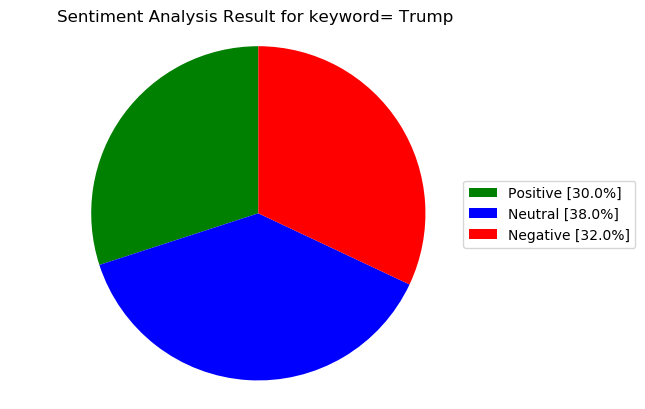

In [170]:
#Creating PieCart

labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['green', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)

plt.style.use('default')
plt.legend(labels, loc='center left', bbox_to_anchor=(0.9, 0.5))
plt.title("Sentiment Analysis Result for keyword= "+keyword+"" )
plt.axis('equal')
plt.show()

##### Cleaning Tweets to Analyse Sentiment

In [175]:
#Cleaning Dataframe if we have some duplicate
tweet_list.duplicated(keep=False)
tweet_list.drop_duplicates(inplace = True)
tweet_list.head()

,0
0,RT @EmilyGorcenski: Remember how the right spe...
1,"RT @atrupar: ""we are listening to Trump -- you..."
2,@TheRickWilson No I agree lock the leaders of ...
3,RT @RepAdamSchiff: Donald Trump should never r...
4,RT @jaarreaza: #COMUNICADO | Venezuela rechaza...


In [177]:
#Rename column for work inside series and applicate remove Punctuation
tweet_list.columns = ['text']
tweet_list.head()

,text
0,RT @EmilyGorcenski: Remember how the right spe...
1,"RT @atrupar: ""we are listening to Trump -- you..."
2,@TheRickWilson No I agree lock the leaders of ...
3,RT @RepAdamSchiff: Donald Trump should never r...
4,RT @jaarreaza: #COMUNICADO | Venezuela rechaza...


In [178]:
# the following scripts remove excess punctuation
p = re.compile(r'[^\w\s]+')
tweet_list['text'] = [p.sub('', x) for x in tweet_list['text'].tolist()]

# remove Character RT inside tweet
tweet_list["text"]= tweet_list["text"].replace({'RT':''}, regex=True)

# apply lowercase 
tweet_list["text"]= tweet_list["text"].str.lower()

In [180]:
# we can see the difference between before and now
tweet_list.head()

,text
0,emilygorcenski remember how the right spent f...
1,atrupar we are listening to trump your boss ...
2,therickwilson no i agree lock the leaders of t...
3,repadamschiff donald trump should never recei...
4,jaarreaza comunicado venezuela rechaza enérg...


#### Sentiment Analyse

In [181]:
# After clean Text we can calculating Negative, Positive, Neutral and Compound values

tweet_list[['polarity', 'subjectivity']] = tweet_list["text"].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tweet_list["text"].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tweet_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tweet_list.loc[index, 'sentiment'] = "positive"
    else:
        tweet_list.loc[index, 'sentiment'] = "neutral"
    tweet_list.loc[index, 'neg'] = neg
    tweet_list.loc[index, 'neu'] = neu
    tweet_list.loc[index, 'pos'] = pos
    tweet_list.loc[index, 'compound'] = comp

tweet_list.head(10)

,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,emilygorcenski remember how the right spent f...,-0.004762,0.411905,negative,0.259,0.741,0.000,-0.7430
1,atrupar we are listening to trump your boss ...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
2,therickwilson no i agree lock the leaders of t...,0.000000,0.000000,positive,0.095,0.690,0.216,0.4215
3,repadamschiff donald trump should never recei...,0.000000,0.125000,negative,0.221,0.779,0.000,-0.6259
4,jaarreaza comunicado venezuela rechaza enérg...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
6,normornstein it looks to me as if there are n...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
7,lindseygrahamsc so let me sum upit is okay for...,0.500000,0.500000,positive,0.000,0.913,0.087,0.2263
8,kylegriffin1 footage from the capitol riot sh...,0.000000,0.000000,negative,0.167,0.833,0.000,-0.5574
9,business presidentelect joe biden will issue ...,0.250000,0.333333,neutral,0.000,1.000,0.000,0.0000
10,steve_vladeck convicting trump after hes no l...,0.000000,0.125000,negative,0.109,0.891,0.000,-0.2960


In [182]:
#Creating new data frames for all sentiments (positive, negative and neutral)

tw_list_negative = tweet_list[tweet_list["sentiment"]=="negative"]
tw_list_positive = tweet_list[tweet_list["sentiment"]=="positive"]
tw_list_neutral = tweet_list[tweet_list["sentiment"]=="neutral"]

In [183]:
#Function for count_values_in single columns

def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [184]:
#Count_values for sentiment
count_values_in_column(tweet_list,"sentiment")

,Total,Percentage
neutral,17,36.17
negative,15,31.91
positive,15,31.91


In [185]:
#Create Wordcloud
def create_wordcloud(text):
    #mask = np.array(Image.open("cloud.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
                  #mask = mask,
                  max_words=1000,
                  stopwords=stopwords,
                  repeat=True)
    wc.generate(str(text))
    wc.to_file("wc.png")
    print("Word Cloud Saved Successfully")
    path="wc.png"
    display(Image.open(path))

Word Cloud Saved Successfully


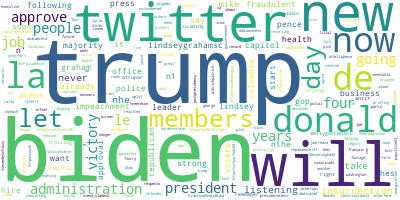

In [186]:
#Creating wordcloud for all tweets
create_wordcloud(tweet_list["text"].values)

Word Cloud Saved Successfully


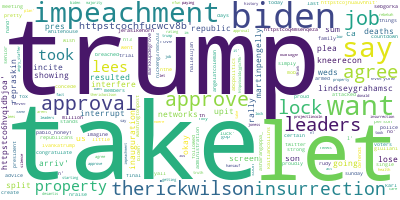

In [187]:
#Creating wordcloud for positive sentiment
create_wordcloud(tw_list_positive["text"].values)

Word Cloud Saved Successfully


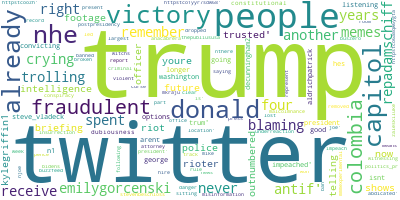

In [188]:
#Creating wordcloud for negative sentiment
create_wordcloud(tw_list_negative["text"].values)

In [189]:
#Calculating tweet's lenght and word count
tweet_list['text_len'] = tweet_list['text'].astype(str).apply(len)
tweet_list['text_word_count'] = tweet_list['text'].apply(lambda x: len(str(x).split()))

In [190]:
round(pd.DataFrame(tweet_list.groupby("sentiment").text_len.mean()),2)

,text_len
sentiment,
negative,122.6
neutral,120.0
positive,120.0


In [191]:
round(pd.DataFrame(tweet_list.groupby("sentiment").text_word_count.mean()),2)

,text_word_count
sentiment,
negative,18.4
neutral,19.0
positive,19.6


#### Convert a collection of text documents to a matrix of token counts, apply count vectorizer.

In [192]:
#Removing Punctuation
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

tweet_list['punct'] = tweet_list['text'].apply(lambda x: remove_punct(x))

In [193]:
#Appliyng tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text

tweet_list['tokenized'] = tweet_list['punct'].apply(lambda x: tokenization(x.lower()))

In [194]:
tweet_list

,text,polarity,subjectivity,sentiment,neg,neu,pos,compound,text_len,text_word_count,punct,tokenized
0,emilygorcenski remember how the right spent f...,-0.004762,0.411905,negative,0.259,0.741,0.000,-0.7430,133,20,emilygorcenski remember how the right spent f...,"[, emilygorcenski, remember, how, the, right, ..."
1,atrupar we are listening to trump your boss ...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000,64,9,atrupar we are listening to trump your boss ...,"[, atrupar, we, are, listening, to, trump, you..."
2,therickwilson no i agree lock the leaders of t...,0.000000,0.000000,positive,0.095,0.690,0.216,0.4215,130,21,therickwilson no i agree lock the leaders of t...,"[therickwilson, no, i, agree, lock, the, leade..."
3,repadamschiff donald trump should never recei...,0.000000,0.125000,negative,0.221,0.779,0.000,-0.6259,131,20,repadamschiff donald trump should never recei...,"[, repadamschiff, donald, trump, should, never..."
4,jaarreaza comunicado venezuela rechaza enérg...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000,132,19,jaarreaza comunicado venezuela rechaza enérg...,"[, jaarreaza, comunicado, venezuela, rechaza, ..."
6,normornstein it looks to me as if there are n...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000,133,25,normornstein it looks to me as if there are n...,"[, normornstein, it, looks, to, me, as, if, th..."
7,lindseygrahamsc so let me sum upit is okay for...,0.500000,0.500000,positive,0.000,0.913,0.087,0.2263,126,24,lindseygrahamsc so let me sum upit is okay for...,"[lindseygrahamsc, so, let, me, sum, upit, is, ..."
8,kylegriffin1 footage from the capitol riot sh...,0.000000,0.000000,negative,0.167,0.833,0.000,-0.5574,130,21,kylegriffin footage from the capitol riot sho...,"[, kylegriffin, footage, from, the, capitol, r..."
9,business presidentelect joe biden will issue ...,0.250000,0.333333,neutral,0.000,1.000,0.000,0.0000,134,23,business presidentelect joe biden will issue ...,"[, business, presidentelect, joe, biden, will,..."
10,steve_vladeck convicting trump after hes no l...,0.000000,0.125000,negative,0.109,0.891,0.000,-0.2960,131,20,stevevladeck convicting trump after hes no lo...,"[, stevevladeck, convicting, trump, after, hes..."


In [198]:
#Removing stopwords such as “the”, “a”, “an”, “in” that a search engine has been programmed to ignore
from nltk.corpus import stopwords

stopword = nltk.corpus.stopwords.words('english') + stopwords.words('italian')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
tweet_list['nonstop'] = tweet_list['tokenized'].apply(lambda x: remove_stopwords(x))

In [199]:
#Appliyng Stemmer, Stemmers remove morphological affixes from words, leaving only the word stem.
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

tweet_list['stemmed'] = tweet_list['nonstop'].apply(lambda x: stemming(x))

In [200]:
tweet_list

,text,polarity,subjectivity,sentiment,neg,neu,pos,compound,text_len,text_word_count,punct,tokenized,nonstop,stemmed
0,emilygorcenski remember how the right spent f...,-0.004762,0.411905,negative,0.259,0.741,0.000,-0.7430,133,20,emilygorcenski remember how the right spent f...,"[, emilygorcenski, remember, how, the, right, ...","[, emilygorcenski, remember, right, spent, fou...","[, emilygorcenski, rememb, right, spent, four,..."
1,atrupar we are listening to trump your boss ...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000,64,9,atrupar we are listening to trump your boss ...,"[, atrupar, we, are, listening, to, trump, you...","[, atrupar, listening, trump, boss, httpstcokr...","[, atrupar, listen, trump, boss, httpstcokrzlxc]"
2,therickwilson no i agree lock the leaders of t...,0.000000,0.000000,positive,0.095,0.690,0.216,0.4215,130,21,therickwilson no i agree lock the leaders of t...,"[therickwilson, no, i, agree, lock, the, leade...","[therickwilson, agree, lock, leaders, insurrec...","[therickwilson, agre, lock, leader, insurrect,..."
3,repadamschiff donald trump should never recei...,0.000000,0.125000,negative,0.221,0.779,0.000,-0.6259,131,20,repadamschiff donald trump should never recei...,"[, repadamschiff, donald, trump, should, never...","[, repadamschiff, donald, trump, never, receiv...","[, repadamschiff, donald, trump, never, receiv..."
4,jaarreaza comunicado venezuela rechaza enérg...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000,132,19,jaarreaza comunicado venezuela rechaza enérg...,"[, jaarreaza, comunicado, venezuela, rechaza, ...","[, jaarreaza, comunicado, venezuela, rechaza, ...","[, jaarreaza, comunicado, venezuela, rechaza, ..."
6,normornstein it looks to me as if there are n...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000,133,25,normornstein it looks to me as if there are n...,"[, normornstein, it, looks, to, me, as, if, th...","[, normornstein, looks, five, members, postal,...","[, normornstein, look, five, member, postal, b..."
7,lindseygrahamsc so let me sum upit is okay for...,0.500000,0.500000,positive,0.000,0.913,0.087,0.2263,126,24,lindseygrahamsc so let me sum upit is okay for...,"[lindseygrahamsc, so, let, me, sum, upit, is, ...","[lindseygrahamsc, let, sum, upit, okay, us, pr...","[lindseygrahamsc, let, sum, upit, okay, us, pr..."
8,kylegriffin1 footage from the capitol riot sh...,0.000000,0.000000,negative,0.167,0.833,0.000,-0.5574,130,21,kylegriffin footage from the capitol riot sho...,"[, kylegriffin, footage, from, the, capitol, r...","[, kylegriffin, footage, capitol, riot, shows,...","[, kylegriffin, footag, capitol, riot, show, r..."
9,business presidentelect joe biden will issue ...,0.250000,0.333333,neutral,0.000,1.000,0.000,0.0000,134,23,business presidentelect joe biden will issue ...,"[, business, presidentelect, joe, biden, will,...","[, business, presidentelect, joe, biden, issue...","[, busi, presidentelect, joe, biden, issu, flu..."
10,steve_vladeck convicting trump after hes no l...,0.000000,0.125000,negative,0.109,0.891,0.000,-0.2960,131,20,stevevladeck convicting trump after hes no lo...,"[, stevevladeck, convicting, trump, after, hes...","[, stevevladeck, convicting, trump, hes, longe...","[, stevevladeck, convict, trump, he, longer, p..."


In [201]:
#Cleaning Text
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) 
    # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    
    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  
    # remove stopwords and stemming
    return text

In [202]:
tweet_list.head()

,text,polarity,subjectivity,sentiment,neg,neu,pos,compound,text_len,text_word_count,punct,tokenized,nonstop,stemmed
0,emilygorcenski remember how the right spent f...,-0.004762,0.411905,negative,0.259,0.741,0.000,-0.7430,133,20,emilygorcenski remember how the right spent f...,"[, emilygorcenski, remember, how, the, right, ...","[, emilygorcenski, remember, right, spent, fou...","[, emilygorcenski, rememb, right, spent, four,..."
1,atrupar we are listening to trump your boss ...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000,64,9,atrupar we are listening to trump your boss ...,"[, atrupar, we, are, listening, to, trump, you...","[, atrupar, listening, trump, boss, httpstcokr...","[, atrupar, listen, trump, boss, httpstcokrzlxc]"
2,therickwilson no i agree lock the leaders of t...,0.000000,0.000000,positive,0.095,0.690,0.216,0.4215,130,21,therickwilson no i agree lock the leaders of t...,"[therickwilson, no, i, agree, lock, the, leade...","[therickwilson, agree, lock, leaders, insurrec...","[therickwilson, agre, lock, leader, insurrect,..."
3,repadamschiff donald trump should never recei...,0.000000,0.125000,negative,0.221,0.779,0.000,-0.6259,131,20,repadamschiff donald trump should never recei...,"[, repadamschiff, donald, trump, should, never...","[, repadamschiff, donald, trump, never, receiv...","[, repadamschiff, donald, trump, never, receiv..."
4,jaarreaza comunicado venezuela rechaza enérg...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000,132,19,jaarreaza comunicado venezuela rechaza enérg...,"[, jaarreaza, comunicado, venezuela, rechaza, ...","[, jaarreaza, comunicado, venezuela, rechaza, ...","[, jaarreaza, comunicado, venezuela, rechaza, ..."


In [203]:
#Appliyng Countvectorizer
countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(tweet_list['text'])
print('{} Number of reviews has {} words'.format(countVector.shape[0], countVector.shape[1]))
#print(countVectorizer.get_feature_names())

47 Number of reviews has 434 words


In [204]:
count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
count_vect_df.head()

,,abcpolit,abdic,account,act,action,administr,advic,agre,aldrichpatrick,...,witch,without,wont,word,world,would,yall,year,your,zaleskiluk
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [206]:
# Most Used Words
count = pd.DataFrame(count_vect_df.sum())
countdf = count.sort_values(0,ascending=False).head(20)
countdf[1:11]

,0
,38
biden,6
approv,5
impeach,4
de,4
presid,4
twitter,4
offic,4
job,3
go,3


In [207]:
#Function to ngram
def get_top_n_gram(corpus,ngram_range,n=None):
    vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

##### An n-gram is a subsequence of n elements of a given sequence. the elements in question can be syllables, letters, words, etc.
##### An n-gram of length 2 is called a "digram", of length 3 "trigram"

In [208]:
#n2_bigram
n2_bigrams = get_top_n_gram(tweet_list['text'],(2,2),20)

n2_bigrams

[('donald trump', 2),
 ('mike pence', 2),
 ('trump impeachment', 2),
 ('lindsey graham', 2),
 ('trumps job', 2),
 ('president trump', 2),
 ('emilygorcenski remember', 1),
 ('remember right', 1),
 ('right spent', 1),
 ('spent years', 1),
 ('years trolling', 1),
 ('trolling people', 1),
 ('people memes', 1),
 ('memes people', 1),
 ('people crying', 1),
 ('crying trumps', 1),
 ('trumps victory', 1),
 ('victory blaming', 1),
 ('blaming antif', 1),
 ('atrupar listening', 1)]

In [209]:
#n3_trigram
n3_trigrams = get_top_n_gram(tweet_list['text'],(3,3),20)

n3_trigrams

[('emilygorcenski remember right', 1),
 ('remember right spent', 1),
 ('right spent years', 1),
 ('spent years trolling', 1),
 ('years trolling people', 1),
 ('trolling people memes', 1),
 ('people memes people', 1),
 ('memes people crying', 1),
 ('people crying trumps', 1),
 ('crying trumps victory', 1),
 ('trumps victory blaming', 1),
 ('victory blaming antif', 1),
 ('atrupar listening trump', 1),
 ('listening trump boss', 1),
 ('trump boss httpstco9k14rzlxc1', 1),
 ('therickwilson agree lock', 1),
 ('agree lock leaders', 1),
 ('lock leaders insurrection', 1),
 ('leaders insurrection trumps', 1),
 ('insurrection trumps property', 1)]